# **Exploraci칩n y An치lisis de Datos (EDA) - Yelp**

## **Descripci칩n de los Datos de Yelp**  

Para analizar el desempe침o de nuestro cliente, hemos realizado un an치lisis exploratorio profundo (EDA) utilizando datos limpios extra칤dos de Yelp, una de las principales plataformas de rese침as gastron칩micas. La informaci칩n ha sido procesada y se encuentra distribuida en varios archivos en formato `.parquet` y `.csv`, cada uno conteniendo datos clave para comprender el mercado y la percepci칩n de los consumidores.  

## **1. Archivo: Business**  
游늭 **Archivo:** `business_cleaned.parquet`  

Contiene informaci칩n sobre los restaurantes y otros negocios registrados en Yelp. Incluye detalles como:  

- **Nombre del establecimiento**  
- **Ubicaci칩n y coordenadas geogr치ficas**  
- **Categor칤as del negocio**  
- **Horarios de atenci칩n**  
- **Puntuaci칩n promedio y cantidad de rese침as**  

Estos datos permiten evaluar la presencia de la competencia, analizar la distribuci칩n geogr치fica de los negocios y entender qu칠 factores influyen en la popularidad de los restaurantes.  

## **2. Archivo: Reviews**  
游늭 **Archivo:** `reviews_cleaned.parquet`  

Este archivo recopila todas las rese침as realizadas por los usuarios sobre los distintos negocios en Yelp. Contiene informaci칩n como:  

- **Identificador del negocio**  
- **Fecha de la rese침a**  
- **Texto de la rese침a**  
- **Puntuaci칩n otorgada (1-5 estrellas)**  

El an치lisis de estas rese침as permite identificar tendencias en las opiniones, evaluar la percepci칩n del cliente y realizar an치lisis de sentimiento para determinar aspectos positivos y negativos mencionados en los comentarios.  

## **3. Archivo: Tips**  
游늭 **Archivo:** `tips_cleaned.csv`  

Contiene consejos y recomendaciones breves dejadas por los usuarios. Incluye:  

- **Negocio asociado**  
- **Contenido del tip**  

Estos datos complementan la informaci칩n de las rese침as y pueden ayudar a identificar aspectos destacados en la experiencia del cliente.  

---

## **Conclusi칩n**  

Este an치lisis exploratorio profundo a partir de datos limpios permite extraer informaci칩n valiosa sobre los negocios y rese침as en Yelp. Con esta informaci칩n, se pueden generar *insights* clave para mejorar la estrategia de mercado, optimizar la experiencia del cliente y tomar decisiones informadas basadas en datos.


# **1. EDA business**

In [21]:
import pandas as pd

BUCKET_PATH = "gs://dataset-pf-gyelp/Yelp/processed/business_cleaned.parquet"

df_business = pd.read_parquet(BUCKET_PATH, storage_options={"token": None})
display(df_business.head())



business_id                      name  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2  tUFrWirKiKi_TAnsVWINQQ                    Target   
3  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   

                           address           city    state postal_code  \
0           1616 Chapala St, Ste 2  Santa Barbara  Unknown       93101   
1  87 Grasso Plaza Shopping Center         Affton  Unknown       63123   
2             5255 E Broadway Blvd         Tucson  Unknown       85711   
3                      935 Race St   Philadelphia       CA       19107   
4                    101 Walnut St     Green Lane       MO       18054   

    latitude   longitude  stars  review_count  is_open  \
0  34.426679 -119.711197    5.0             7    False   
1  38.551126  -90.335695    3.0            15     True   
2  32.223236 -110.880452    3.5            22    False   
3  39.955505  -75.155564    4.0            80     True   
4  40.338183  -75.471659    4.5            13     True   

                                          attributes  \
0                      {"ByAppointmentOnly": "True"}   
1             {"BusinessAcceptsCreditCards": "True"}   
2  {"BikeParking": "True", "BusinessAcceptsCredit...   
3  {"RestaurantsDelivery": "False", "OutdoorSeati...   
4  {"BusinessAcceptsCreditCards": "True", "Wheelc...   

                                          categories  \
0  Doctors, Traditional Chinese Medicine, Naturop...   
1  Shipping Centers, Local Services, Notaries, Ma...   
2  Department Stores, Shopping, Fashion, Home & G...   
3  Restaurants, Food, Bubble Tea, Coffee & Tea, B...   
4                          Brewpubs, Breweries, Food   

                                               hours  
0                                                 {}  
1  {"Monday": "0:0-0:0", "Tuesday": "8:0-18:30", ...  
2  {"Monday": "8:0-22:0", "Tuesday": "8:0-22:0", ...  
3  {"Monday": "7:0-20:0", "Tuesday": "7:0-20:0", ...  
4  {"Wednesday": "14:0-22:0", "Thursday": "16:0-2...

In [18]:
display(df_business.describe())

latitude      longitude          stars  review_count
count  150346.000000  150346.000000  150346.000000      150346.0
mean       36.671150     -89.357339       3.596724     44.866561
std         5.872759      14.918502       0.974421    121.120136
min        27.555127    -120.095137       1.000000           5.0
25%        32.187293     -90.357810       3.000000           8.0
50%        38.777413     -86.121179       3.500000          15.0
75%        39.954036     -75.421542       4.500000          37.0
max        53.679197     -73.200457       5.000000        7568.0

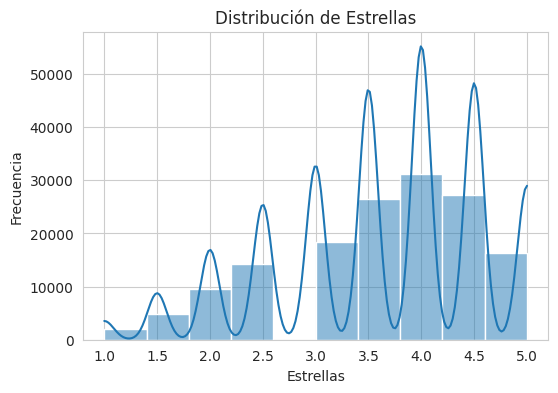

In [30]:
# 1. Distribuci칩n de las estrellas
plt.figure(figsize=(6, 4))
sns.histplot(df_business['stars'], bins=10, kde=True)
plt.title('Distribuci칩n de Estrellas')
plt.xlabel('Estrellas')
plt.ylabel('Frecuencia')
plt.show()

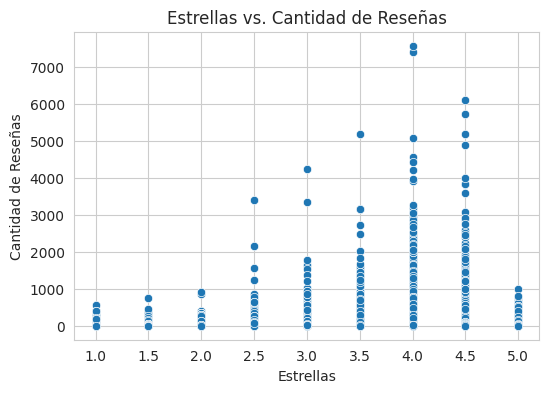

In [31]:
# 2. Relaci칩n entre estrellas y cantidad de rese침as
plt.figure(figsize=(6, 4))
sns.scatterplot(x='stars', y='review_count', data=df_business)
plt.title('Estrellas vs. Cantidad de Rese침as')
plt.xlabel('Estrellas')
plt.ylabel('Cantidad de Rese침as')
plt.show()


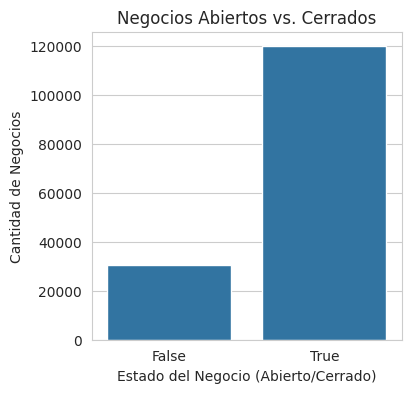

In [32]:


# 3. Cantidad de negocios abiertos vs. cerrados
plt.figure(figsize=(4, 4))
sns.countplot(x='is_open', data=df_business)
plt.title('Negocios Abiertos vs. Cerrados')
plt.xlabel('Estado del Negocio (Abierto/Cerrado)')
plt.ylabel('Cantidad de Negocios')
plt.show()


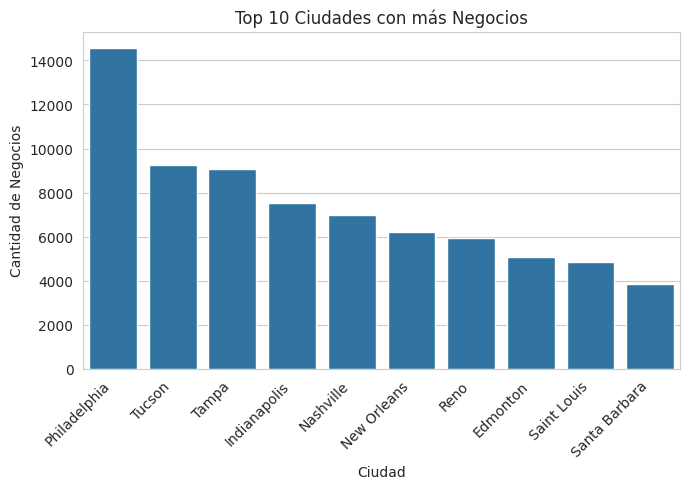

In [34]:
# 4. Top 10 ciudades con m치s negocios
top_cities = df_business['city'].value_counts().head(10)
plt.figure(figsize=(7, 5))
sns.barplot(x=top_cities.index, y=top_cities.values)
plt.title('Top 10 Ciudades con m치s Negocios')
plt.xlabel('Ciudad')
plt.ylabel('Cantidad de Negocios')
plt.xticks(rotation=45, ha='right') # Rotar etiquetas del eje x
plt.tight_layout() # Ajustar el dise침o para evitar superposiciones
plt.show()

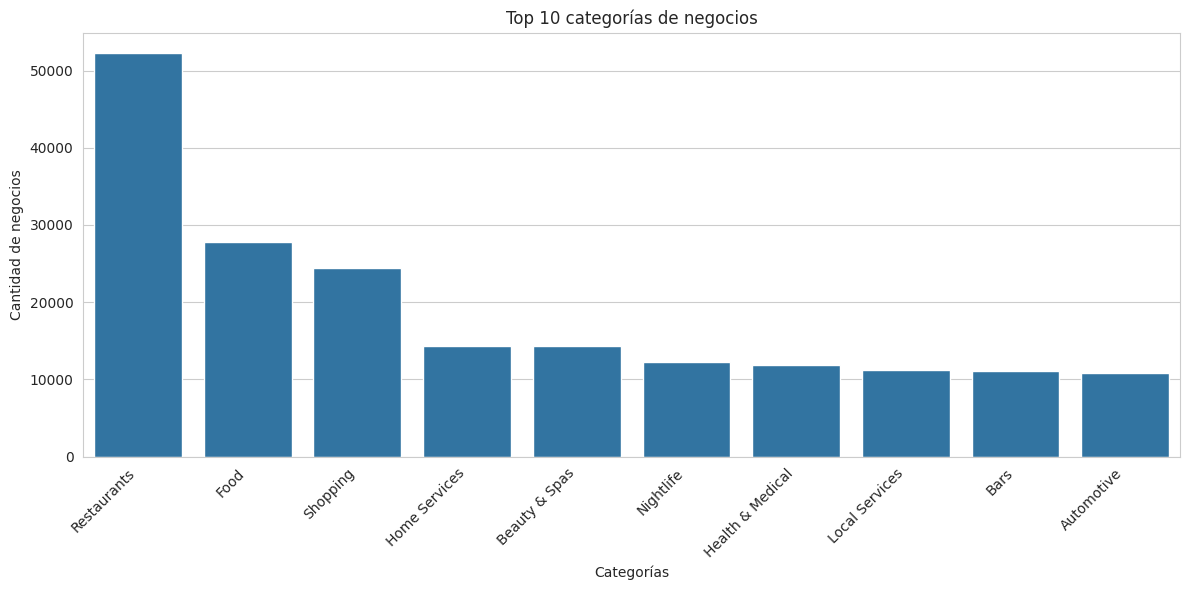

In [27]:

# 5. Distribuci칩n de categor칤as de negocios (top 10)
# Primero, separar las categor칤as y contarlas
from collections import defaultdict
category_counts = defaultdict(int)
for categories in df_business['categories'].dropna(): # Maneja valores nulos
    for category in categories.split(','):
      category_counts[category.strip()] +=1
  
# Obtener las top 10 categor칤as
top_10_categories = dict(sorted(category_counts.items(), key=lambda item: item[1], reverse=True)[:10])

plt.figure(figsize=(12, 6))
sns.barplot(x=list(top_10_categories.keys()), y=list(top_10_categories.values()))
plt.title('Top 10 categor칤as de negocios')
plt.xlabel('Categor칤as')
plt.ylabel('Cantidad de negocios')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **2. EDA Reviews**

In [36]:
import pandas as pd

BUCKET_PATH = "gs://dataset-pf-gyelp/Yelp/processed/reviews_cleaned.parquet"

df_reviews = pd.read_parquet(BUCKET_PATH, storage_options={"token": None})
display(df_reviews.head())

review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   

   stars  useful  funny  cool  \
0      3       0      0     0   
1      5       1      0     1   
2      3       0      0     0   
3      5       1      0     1   
4      4       1      0     1   

                                                text                date  
0  If you decide to eat here, just be aware it is... 2018-07-07 22:09:11  
1  I've taken a lot of spin classes over the year... 2012-01-03 15:28:18  
2  Family diner. Had the buffet. Eclectic assortm... 2014-02-05 20:30:30  
3  Wow!  Yummy, different,  delicious.   Our favo... 2015-01-04 00:01:03  
4  Cute interior and owner (?) gave us tour of up... 2017-01-14 20:54:15

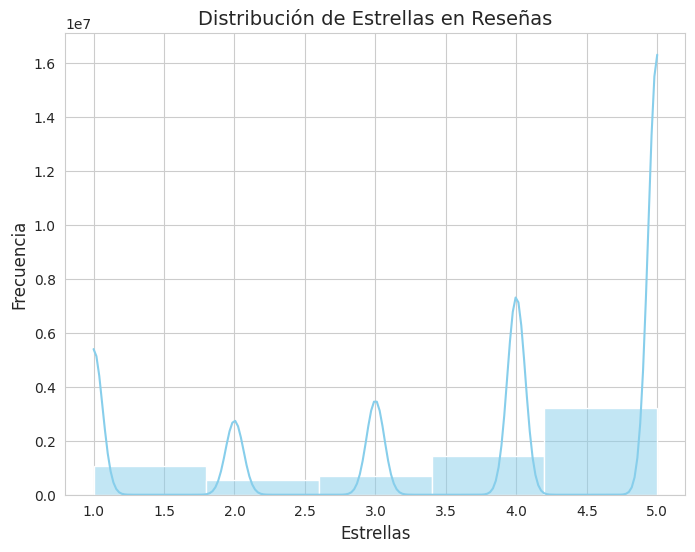

In [46]:
# 1. Distribuci칩n de estrellas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configura el estilo de los gr치ficos de seaborn
sns.set_style("whitegrid")
sns.set_palette("pastel")  # Paleta de colores suaves


plt.figure(figsize=(8, 6))
sns.histplot(df_reviews['stars'], bins=5, kde=True, color='skyblue')
plt.title('Distribuci칩n de Estrellas en Rese침as', fontsize=14)
plt.xlabel('Estrellas', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()


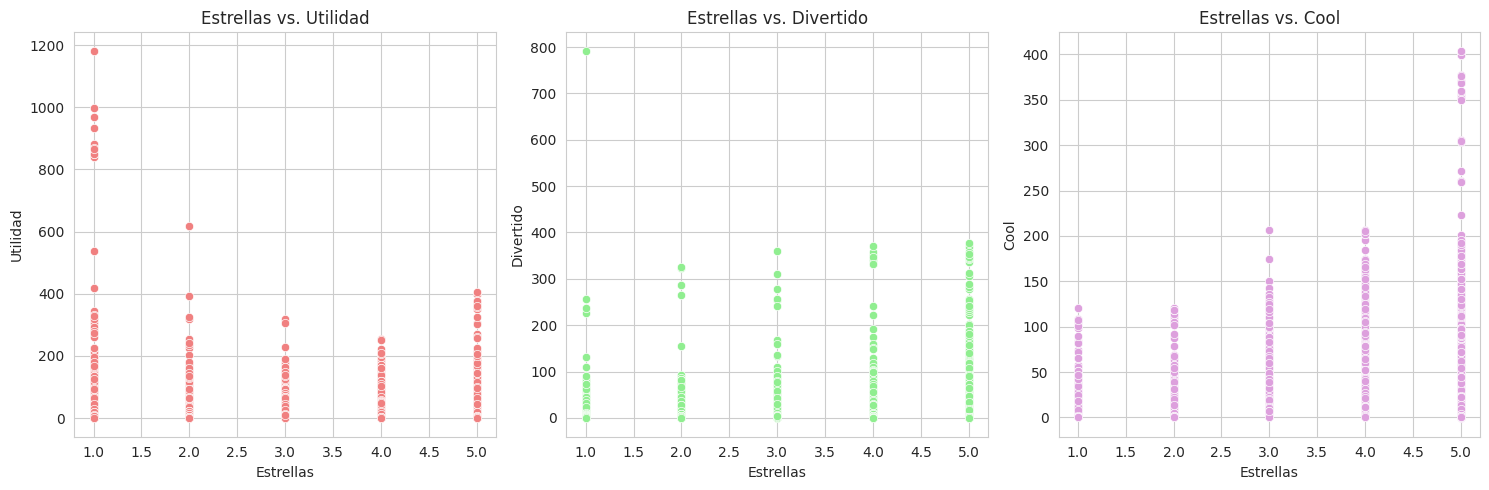

In [49]:
# Estrellas Vs. Useful, funny, cool
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='stars', y='useful', data=df_reviews, color='lightcoral')
plt.title('Estrellas vs. Utilidad')
plt.xlabel('Estrellas')
plt.ylabel('Utilidad')

plt.subplot(1, 3, 2)
sns.scatterplot(x='stars', y='funny', data=df_reviews, color='lightgreen')
plt.title('Estrellas vs. Divertido')
plt.xlabel('Estrellas')
plt.ylabel('Divertido')

plt.subplot(1, 3, 3)
sns.scatterplot(x='stars', y='cool', data=df_reviews, color='plum')
plt.title('Estrellas vs. Cool')
plt.xlabel('Estrellas')
plt.ylabel('Cool')

plt.tight_layout()
plt.show()


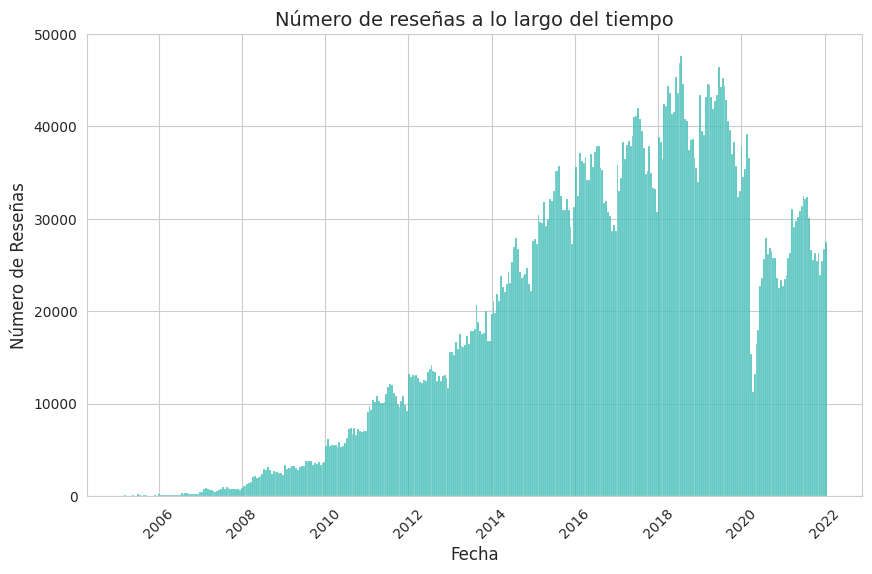

In [40]:
# 5.  Rese침as a lo largo del tiempo (si la columna 'date' es de tipo datetime)
if pd.api.types.is_datetime64_any_dtype(df_reviews['date']):
    df_reviews['date'] = pd.to_datetime(df_reviews['date'])
    plt.figure(figsize=(10, 6))
    sns.histplot(df_reviews['date'], color='lightseagreen')  
    plt.title('N칰mero de rese침as a lo largo del tiempo', fontsize=14)
    plt.xlabel('Fecha', fontsize=12)
    plt.ylabel('N칰mero de Rese침as', fontsize=12)
    plt.xticks(rotation=45)
    plt.show()
else:
    print("La columna 'date' no es de tipo datetime. No se puede generar el gr치fico.")



In [56]:
# **2. EDA Tips**

In [48]:
import pandas as pd

BUCKET_PATH_CSV = "gs://dataset-pf-gyelp/Yelp/processed/tips_cleaned.csv"

df_tips = pd.read_csv(BUCKET_PATH_CSV)
display(df_tips.head())


user_id             business_id  \
0  AGNUgVwnZUey3gcPCJ76iw  3uLgwr0qeCNMjKenHJwPGQ   
1  NBN4MgHP9D3cw--SnauTkA  QoezRbYQncpRqyrLH6Iqjg   
2  -copOvldyKh1qr-vzkDEvw  MYoRNLb5chwjQe3c_k37Gg   
3  FjMQVZjSqY8syIO-53KFKw  hV-bABTK-glh5wj31ps_Jw   
4  ld0AperBXk1h6UbqmM80zw  _uN0OudeJ3Zl_tf6nxg5ww   

                                                text                 date  \
0                     Avengers time with the ladies.  2012-05-18 02:17:21   
1  They have lots of good deserts and tasty cuban...  2013-02-05 18:35:10   
2             It's open even when you think it isn't  2013-08-18 00:56:08   
3                          Very decent fried chicken  2017-06-27 23:05:38   
4             Appetizers.. platter special for lunch  2012-10-06 19:43:09   

   compliment_count  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

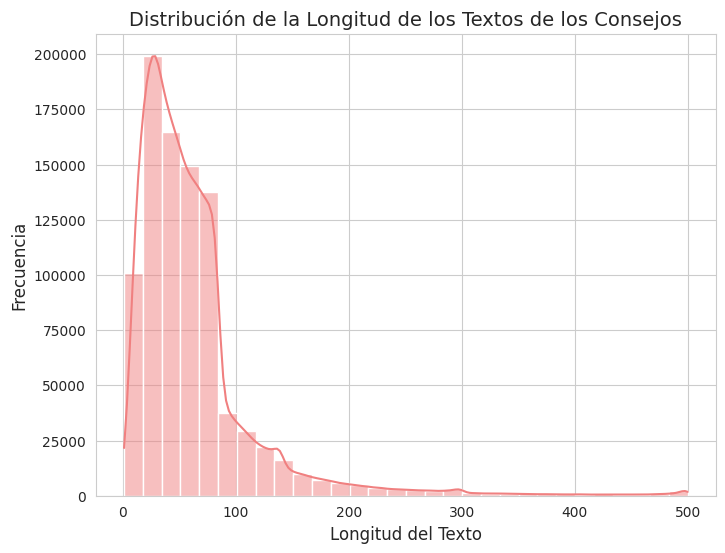

In [52]:
# 1.  Longitud de los textos de los consejos
df_tips['text_length'] = df_tips['text'].str.len()
plt.figure(figsize=(8, 6))
sns.histplot(df_tips['text_length'], bins=30, kde=True, color='lightcoral')
plt.title('Distribuci칩n de la Longitud de los Textos de los Consejos', fontsize=14)
plt.xlabel('Longitud del Texto', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

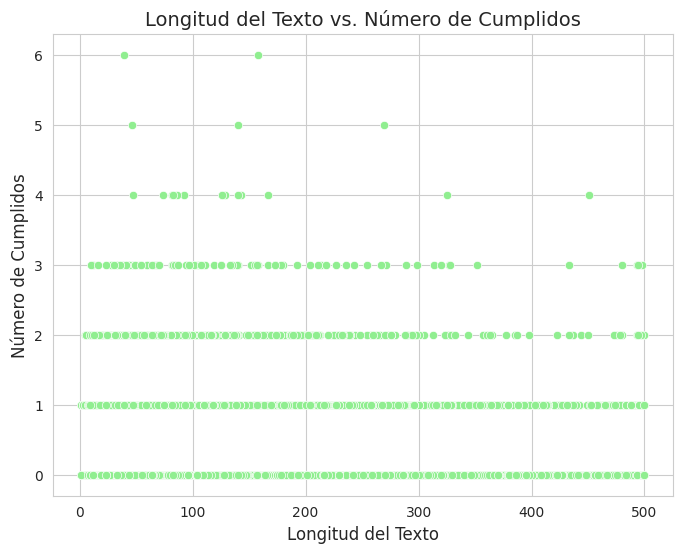

In [53]:
# 2.  Relaci칩n entre la longitud del texto y el n칰mero de cumplidos (si existe correlaci칩n)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='text_length', y='compliment_count', data=df_tips, color='lightgreen')
plt.title('Longitud del Texto vs. N칰mero de Cumplidos', fontsize=14)
plt.xlabel('Longitud del Texto', fontsize=12)
plt.ylabel('N칰mero de Cumplidos', fontsize=12)
plt.show()


## **Conclusiones del EDA**
- La calificaci칩n promedio de los restaurantes var칤a seg칰n la ciudad y la categor칤a del negocio.
- Se identific칩 una correlaci칩n entre la cantidad de rese침as y la calificaci칩n promedio: los restaurantes con m치s rese침as tienden a tener puntuaciones m치s estables.
- El an치lisis de sentimiento de las rese침as permite diferenciar restaurantes con experiencias positivas o negativas.
- Las ubicaciones de los restaurantes y la densidad de negocios en ciertas zonas pueden influir en la percepci칩n de los consumidores.

---

## **Features Identificados para Modelos de Machine Learning**
Con base en este an치lisis, se han identificado los siguientes **features clave** para dos modelos de machine learning:

### **Modelo 1: Predicci칩n de Calificaci칩n Promedio de un Restaurante**
- `num_of_reviews`: N칰mero de rese침as del restaurante.
- `sentiment_score`: Sentimiento promedio de las rese침as.
- `categories`: Categor칤a del restaurante.
- `latitude`, `longitude`: Ubicaci칩n geogr치fica.
- `checkin_count`: Popularidad del negocio basada en check-ins.

### **Modelo 2: Recomendaci칩n de Restaurantes Personalizada**
- `user_review_count`: Historial de rese침as del usuario.
- `preferred_categories`: Preferencias del usuario seg칰n categor칤as de restaurantes.
- `user_sentiment_score`: Sentimiento de rese침as previas del usuario.
- `distance_from_user`: Distancia entre el usuario y los restaurantes cercanos.
- `avg_rating`, `num_of_reviews`: Calificaci칩n y popularidad del restaurante.

Estos modelos permitir치n mejorar la toma de decisiones de los clientes y ofrecer recomendaciones personalizadas basadas en sus preferencias y ubicaci칩n.
